This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.1185532 ]
 [ 1.9900709 ]
 [-0.12856834]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)  # 0에서 1까지
print(x)

tf.Tensor(
[[0.48493493]
 [0.7262447 ]
 [0.9877124 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


**Creating a TensorFlow variable**

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)
# 위 코드는 TensorFlow를 사용하여 shape가 (3, 1)이고 값이 0과 1 사이의 균등분포에서 랜덤으로 선택된 값으로 이루어진 텐서 x를 생성하고, shape가 (3, 1)이고 
# 값이 평균 0, 표준편차 1인 정규분포에서 랜덤으로 선택된 값으로 이루어진 TensorFlow 변수 v를 생성하는 코드입니다.

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.0453777 ],
       [-0.44027913],
       [ 0.5215913 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [8]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [10]:
v.assign_add(tf.ones((3, 1))) # 1씩 더함

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [15]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)
# 이 코드는 변수 input_var에 대해 tf.square()를 취한 결과를 계산하고, 이를 변수 result에 할당합니다. 
# 그 다음 tf.GradientTape() 내에서 result를 input_var에 대해 미분하면서 기울기를 계산합니다. 이를 gradient에 할당합니다.
# 즉, gradient는 result를 input_var에 대해 미분한 값, 즉 2 * input_var 입니다.

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [16]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)
# 이 코드는 상수 텐서(input_const)의 변화에 대한 그래디언트를 구하기 위해 tape.watch() 메서드를 사용합니다. 
# tape.watch() 메서드는 해당 텐서를 감시하도록 지시합니다. 
# 그래서 input_const를 감싸면 tape.gradient() 메서드에서 그래디언트를 구할 때 해당 텐서에 대한 그래디언트를 계산합니다. 
# 따라서 이 코드에서는 input_const에 대한 그래디언트를 구할 수 있습니다.

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [19]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)
print(speed)

# 위 코드는 물리학에서 자주 사용되는 운동학적인 개념을 TensorFlow의 GradientTape을 사용하여 미분하는 방법을 보여줍니다.
# time이라는 변수를 0으로 초기화한 후, outer_tape과 inner_tape을 이용해 각각 가속도(acceleration)와 속도(speed)의 변화율을 계산합니다.
#inner_tape는 position을 time에 대해 미분하여 speed를 계산하고, outer_tape는 speed를 time에 대해 미분하여 acceleration을 계산합니다.


tf.Tensor(9.8, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [23]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# 이 코드는 numpy를 사용하여 두 개의 다변량 정규 분포로부터 샘플을 생성합니다.
# negative_samples는 평균이 [0, 3]이고 공분산이 [[1, 0.5],[0.5, 1]]인 다변량 정규 분포에서 num_samples_per_class 수의 샘플을 추출합니다.
# positive_samples는 평균이 [3, 0]이고 공분산이 [[1, 0.5],[0.5, 1]]인 다변량 정규 분포에서 num_samples_per_class 수의 샘플을 추출합니다.
# 이러한 샘플은 이후 분류 문제에서 데이터 세트를 구성하는 데 사용됩니다.

**Stacking the two classes into an array with shape (2000, 2)**

In [24]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# inputs는 negative_samples와 positive_samples를 수직으로 쌓아서 만든 NumPy 배열입니다. 
# negative_samples와 positive_samples는 각각 2차원 NumPy 배열이고, inputs는 이 둘을 쌓아서 만든 2차원 NumPy 배열입니다. 
# astype(np.float32)는 모든 원소를 32비트 부동소수점형으로 변환하는 것입니다.
# 즉, inputs는 negative_samples와 positive_samples를 쌓아서 만든 2차원 NumPy 배열이고, 모든 원소가 32비트 부동소수점형입니다.

**Generating the corresponding targets (0 and 1)**

In [25]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
# targets는 레이블을 나타내는 변수로, inputs의 각 샘플이 양성(positive)인지 음성(negative)인지를 나타냅니다. 
# 여기서는 negative_samples에 대한 레이블은 0, positive_samples에 대한 레이블은 1로 지정하였습니다. 
# np.vstack() 함수를 사용하여 두 개의 데이터셋을 수직으로 쌓아서 하나의 배열로 만들었습니다. 이때 데이터 타입을 float32로 지정했습니다.

**Plotting the two point classes**

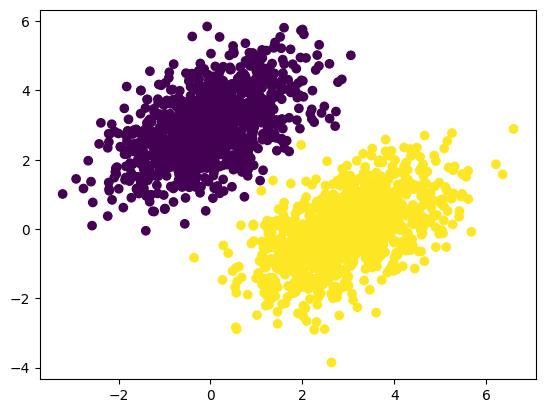

In [26]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()
# 위 코드는 2차원 공간상에 negative 클래스와 positive 클래스를 각각 파란색과 빨간색으로 나타내는 산점도 그래프를 출력하는 코드입니다. 
# inputs는 데이터 포인트들의 2차원 좌표를 담은 배열이고, targets는 각 데이터 포인트가 negative 클래스인지 positive 클래스인지를 나타내는 레이블을 담은 배열입니다. 
# plt.scatter 함수는 inputs 배열의 x좌표와 y좌표를 각각 x, y 축으로 하여 산점도 그래프를 출력합니다.
# c 인자를 이용하여 targets 배열을 산점도 그래프의 색상으로 설정합니다. 마지막으로 plt.show() 함수를 호출하여 그래프를 출력합니다.

**Creating the linear classifier variables**

In [28]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# 주어진 입력 데이터에 대한 이진 분류 문제를 풀기 위해 입력 차원(input_dim) 크기의 가중치 행렬(W)과 출력 차원(output_dim) 크기의 편향(b) 벡터를 변수로 선언하였습니다. 
# 가중치 행렬(W)의 초기값은 입력 차원과 출력 차원의 크기에 맞게 균등 분포에서 임의로 추출하여 할당하였으며, 편향(b) 벡터의 초기값은 모든 요소가 0인 벡터로 할당하였습니다.

**The forward pass function**

In [32]:
def model(inputs):
    return tf.matmul(inputs, W) + b

# 이 모델은 입력 벡터와 가중치 행렬 W의 행렬 곱을 계산한 뒤, 절편 b를 더하여 출력 벡터를 계산하는 단순한 선형 모델입니다. 
# 이 모델은 입력 벡터의 각 차원과 가중치 행렬의 각 열 간에 선형 관계를 모델링합니다.

**The mean squared error loss function**

In [33]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# 이 함수는 타겟과 예측값 간 차이의 제곱을 계산하고, 이를 모든 샘플에 대해 평균을 내어 반환합니다. 
# 즉, 모델의 예측과 실제 타겟 값 사이의 평균 제곱 오차(mean squared error)를 계산합니다.

**The training step function**

In [34]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# 이 코드는 단일 뉴런(single neuron)을 사용하여 이진 분류(binary classification)를 위한 훈련 단계(training step)을 구현합니다.

# learning_rate는 학습률(learning rate)로, 가중치(weight)와 편향(bias)의 업데이트를 제어합니다.

# training_step 함수는 입력(inputs)과 타겟(targets)을 인수로 받습니다. 이 함수는 다음 단계를 수행합니다:

# 입력(inputs)을 모델(model)에 전달하여 예측(predictions)을 생성합니다.
# 손실 함수(loss function) square_loss를 호출하여 타겟(targets)과 예측(predictions) 사이의 손실(loss)을 계산합니다.
# tf.GradientTape을 사용하여 손실(loss)에 대한 가중치(weight)와 편향(bias)의 기울기(gradient)를 계산합니다.
# 기울기(gradient)를 사용하여 가중치(weight)와 편향(bias)을 업데이트합니다.
# 손실(loss)을 반환합니다.
# 가중치(weight) W와 편향(bias) b는 tf.Variable로 초기화됩니다. W는 무작위로 초기화되고 b는 0으로 초기화됩니다.

# 모델(model)은 입력(inputs)을 행렬곱(matmul)과 편향(bias) 더하기(add)를 사용하여 예측(predictions)을 생성하는 단일 뉴런(single neuron)입니다.

# 손실 함수(loss function) square_loss는 예측(predictions)과 타겟(targets) 사이의 평균 제곱 오차(mean squared error)를 계산합니다.

# 가중치(weight)와 편향(bias)의 업데이트는 각각 W.assign_sub(grad_loss_wrt_W * learning_rate)와 b.assign_sub(grad_loss_wrt_b * learning_rate) 코드로 이루어집니다. 
# 이 코드는 현재 가중치(weight)와 편향(bias)에서 기울기(gradient)에 학습률(learning rate)을 곱한 값을 빼서 가중치(weight)와 편향(bias)을 업데이트합니다.    

**The batch training loop**

In [36]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

# 위 코드는 입력 데이터 inputs와 목표값 targets를 사용하여 모델을 학습시키는 반복문입니다. 반복문은 40회 수행됩니다.
# 각 반복에서는 training_step 함수를 호출하여 입력 데이터를 모델에 전달하고, 예측값과 목표값의 차이를 계산하여 손실을 구합니다. 
# 그 후, 손실을 최소화하기 위해 경사하강법을 사용하여 모델의 가중치 W와 편향 b를 업데이트합니다.
# 매 반복에서 손실값이 출력됩니다. 이 값을 통해 학습이 진행되는 동안 손실이 어떻게 변화하는지를 확인할 수 있습니다.    

Loss at step 0: 0.0288
Loss at step 1: 0.0284
Loss at step 2: 0.0280
Loss at step 3: 0.0277
Loss at step 4: 0.0274
Loss at step 5: 0.0272
Loss at step 6: 0.0269
Loss at step 7: 0.0267
Loss at step 8: 0.0265
Loss at step 9: 0.0264
Loss at step 10: 0.0262
Loss at step 11: 0.0261
Loss at step 12: 0.0259
Loss at step 13: 0.0258
Loss at step 14: 0.0257
Loss at step 15: 0.0256
Loss at step 16: 0.0255
Loss at step 17: 0.0254
Loss at step 18: 0.0254
Loss at step 19: 0.0253
Loss at step 20: 0.0252
Loss at step 21: 0.0252
Loss at step 22: 0.0251
Loss at step 23: 0.0251
Loss at step 24: 0.0250
Loss at step 25: 0.0250
Loss at step 26: 0.0250
Loss at step 27: 0.0249
Loss at step 28: 0.0249
Loss at step 29: 0.0249
Loss at step 30: 0.0249
Loss at step 31: 0.0248
Loss at step 32: 0.0248
Loss at step 33: 0.0248
Loss at step 34: 0.0248
Loss at step 35: 0.0248
Loss at step 36: 0.0248
Loss at step 37: 0.0248
Loss at step 38: 0.0247
Loss at step 39: 0.0247


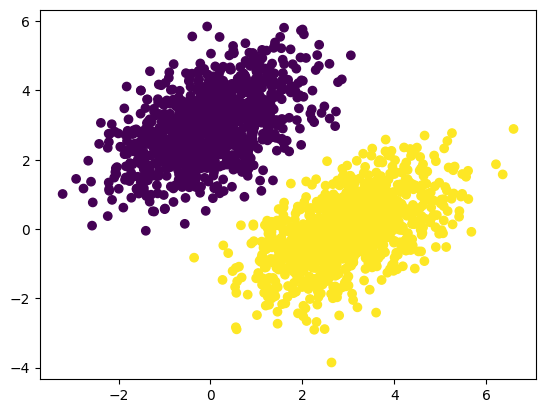

In [37]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# 위 코드는 모델의 예측 결과를 산점도로 시각화하는 코드입니다. 
# model(inputs)를 통해 입력 데이터에 대한 예측 값을 얻은 후, predictions[:, 0] > 0.5를 통해 예측 값이 0.5보다 큰 경우를 True로 표시하고, 
# 그렇지 않은 경우를 False로 표시합니다.
# 이를 산점도로 표현하여, 분류 결과가 시각적으로 확인 가능하게 합니다.

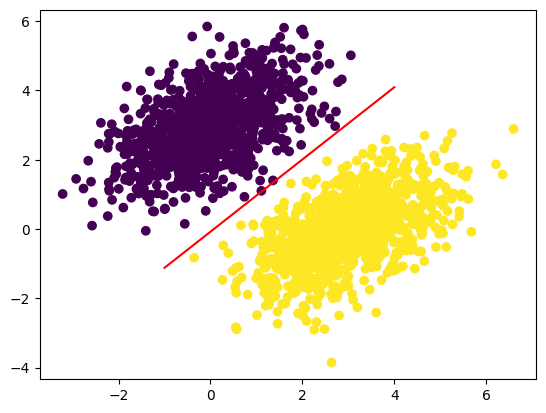

In [38]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# 이 코드는 모델의 경계선을 시각화하는 코드입니다. x는 -1부터 4까지 100개의 점으로 이루어진 배열이고, y는 W[0] / W[1] * x + (0.5 - b) / W[1]으로 계산됩니다. 
# 이 때, W[0]은 가중치 행렬 W의 첫 번째 값, W[1]은 두 번째 값입니다. 이를 통해 x값에 대한 y값을 계산하고, 이를 이용하여 경계선을 그립니다. 
# plt.plot(x, y, "-r")는 x값과 y값을 이용하여 빨간색 실선으로 경계선을 그리는 코드입니다. 
# plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)는 산점도를 그리는 코드이며, 
# predictions[:, 0] > 0.5는 모델이 예측한 값이 0.5보다 큰지 여부에 따라 점의 색상을 결정하는 코드입니다.

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [41]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

# 이 코드는 TensorFlow 2.x를 사용하여 간단한 Dense layer를 만드는 예제입니다.
# SimpleDense 클래스는 keras.layers.Layer를 상속받습니다. __init__ 함수에서는 Dense layer의 뉴런 수(units)와 활성화 함수(activation)를 받습니다.
# build 함수에서는 input shape을 이용하여 weight를 초기화하고(self.W, self.b) 설정합니다. call 함수에서는 input과 weight의 행렬곱을 계산하고, 
# 필요한 경우 활성화 함수를 적용하여 출력을 반환합니다.
# 이렇게 만든 SimpleDense 클래스는 다른 층들과 함께 Sequential 모델이나 Functional API를 이용하여 모델을 구성할 수 있습니다.

In [42]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


# 위 코드는 SimpleDense 클래스를 이용하여 뉴런 네트워크를 정의하고, 2x784 크기의 입력 텐서 input_tensor를 my_dense 층에 통과시키는 과정입니다.
# SimpleDense 클래스는 keras.layers.Layer 클래스를 상속하고 있으므로, build 메소드를 이용해 모델 가중치를 초기화하고, call 메소드에서 입력을 받아 출력값을 계산합니다.
# 여기서 my_dense는 SimpleDense 클래스의 객체입니다. units 인수를 32로 설정하고, 활성화 함수로는 tf.nn.relu를 사용합니다.
# input_tensor는 2x784 크기의 모든 값이 1인 텐서입니다.
# my_dense(input_tensor)은 call 메소드를 호출하는 것과 같습니다. 이를 통해 입력 텐서 input_tensor가 my_dense 층에 통과하고, 출력 텐서 output_tensor이 생성됩니다. 
# 출력 텐서의 크기는 (2, 32)입니다.

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [49]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

# 위 코드는 tensorflow.keras 모듈에서 layers 서브모듈을 불러와서 Dense 클래스를 사용하여 뉴런 32개가 있는 fully connected layer를 생성하는 코드입니다.
#  활성화 함수로는 ReLU 함수가 사용되며, 이를 activation 인자를 통해 지정합니다.

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

# 위 코드는 TensorFlow의 Keras API를 사용하여, Sequential 모델을 생성하는 코드입니다. 이 모델은 두 개의 층으로 이루어져 있습니다.
# 첫 번째 층은 32개의 노드를 가지며, 활성화 함수로 ReLU를 사용합니다. 이 층은 입력 데이터의 차원을 유지합니다.
# 두 번째 층은 32개의 노드를 가지며, 활성화 함수를 지정하지 않았습니다. 따라서 이 층은 입력 데이터의 차원을 줄이지 않고 출력 데이터를 만들어 냅니다.
# Sequential 모델은 입력 데이터를 첫 번째 층에 넣어 출력 데이터를 생성하고, 이를 다시 두 번째 층에 넣어 최종 출력 데이터를 생성합니다.
#  즉, 이 모델은 입력 데이터를 받아 출력 데이터를 생성하는 함수와 같습니다.

In [51]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

# 위의 코드는 4개의 SimpleDense 레이어로 이루어진 신경망 모델을 정의하는 코드입니다. 
# 이 모델은 입력값으로 input_shape가 주어졌을 때, 32개의 출력값을 갖는 첫 번째 레이어, 64개의 출력값을 갖는 두 번째 레이어, 
# 32개의 출력값을 갖는 세 번째 레이어, 그리고 10개의 출력값을 갖는 출력 레이어로 이루어져 있습니다. 
# 첫 번째, 두 번째, 세 번째 레이어는 relu 활성화 함수를 사용하며, 출력 레이어는 softmax 활성화 함수를 사용합니다. 
# 이 모델은 각 레이어의 연산 결과를 이어주는 것이 자동으로 처리되어 순차적인 모델을 구성할 때 편리하게 사용할 수 있도록 Sequential 모델을 사용하여 정의되었습니다.

### From layers to models

### The "compile" step: Configuring the learning process

In [52]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

# 위 코드는 keras.Sequential API를 사용하여 단일 뉴런을 가진 모델을 만들고, rmsprop 옵티마이저와 mean_squared_error 손실 함수를 사용하여 모델을 컴파일한 것입니다. 
# 또한, 모델이 평가될 때 정확도(accuracy)도 측정하도록 설정했습니다.
# 여기서 rmsprop은 경사 하강법을 사용하는 최적화 알고리즘 중 하나이며, mean_squared_error는 회귀 문제에서 많이 사용되는 손실 함수 중 하나입니다. 
# accuracy는 분류 문제에서 모델의 성능을 측정할 때 사용되는 지표 중 하나입니다.

In [53]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# 이 코드는 Sequential 모델을 RMSprop optimizer를 사용하여 컴파일하는 코드입니다. 
# loss로는 Mean Squared Error(MSE)를 사용하고, metrics로는 Binary Accuracy를 사용합니다. 
# 이 모델은 주어진 입력에 대해 하나의 출력을 예측하는 단순한 모델입니다.

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

# model.fit() 메소드는 입력 데이터와 타겟 데이터를 받아서, 이를 사용하여 모델을 학습시킵니다. 
# epochs는 전체 학습 데이터를 몇 번 사용하여 학습을 진행할지를 나타내는 하이퍼파라미터이고, batch_size는 한 번의 forward/backward pass에 사용할 샘플 수를 결정합니다.
# model.fit() 메소드는 학습 과정에서 발생하는 loss와 metric 값을 반환합니다. 이 값들은 히스토리 객체에 저장됩니다.
# 따라서 위 코드에서 inputs와 targets 데이터를 사용하여 모델을 5 epoch 동안 학습시키고, 이 과정에서 발생하는 loss와 binary accuracy 값을 저장한 history 객체가 생성됩니다.

In [ ]:
history.history

# history.history는 딕셔너리 형태의 객체로, 모델 훈련 시 epoch마다의 손실(loss)과 지표(metrics) 값들이 저장되어 있습니다.
# history.history 객체의 키(key) 값으로는 'loss', 'accuracy' 등이 주로 사용됩니다. 이들은 model.compile() 메서드에서 지정한 손실 함수와 지표 함수에 대한 키 값입니다.

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)


# 1. 단일 Dense 레이어를 가진 Sequential 모델을 정의합니다.
# 2. RMSprop 옵티마이저와 MSE 손실 함수를 사용하여 모델을 컴파일합니다.
# 3. 입력과 대상 데이터를 섞은 다음, 훈련 데이터와 검증 데이터로 나눕니다.
# 4. 훈련 데이터로 모델을 훈련하고, 검증 데이터로 검증합니다.


# 위 코드는 TensorFlow를 사용하여 신경망 모델을 학습하는 코드입니다.

# 먼저 keras.Sequential을 사용하여 모델을 정의하고, model.compile을 사용하여 모델의 옵티마이저, 손실 함수 및 메트릭을 설정합니다.

# 그 후, 입력 데이터와 목표 변수를 무작위로 섞은 다음, train-validation-test 데이터셋으로 분리합니다. 이 때 validation_data 매개변수를 사용하여 검증 데이터셋을 설정합니다.

# 마지막으로 model.fit을 호출하여 모델을 학습합니다. epochs 매개변수를 사용하여 전체 데이터셋에서 몇 번의 반복을 수행할지 지정하고,
# batch_size 매개변수를 사용하여 각 반복마다 몇 개의 샘플을 사용할지 지정합니다.

# 학습 후 history.history를 통해 학습 결과를 확인할 수 있습니다.

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

# model.predict(val_inputs, batch_size=128)는 val_inputs 데이터에 대한 모델의 예측값을 반환합니다. 이 때, batch_size는 한 번에 처리할 데이터 샘플 수를 의미합니다. 
# 따라서, predictions 변수에는 val_inputs 데이터의 처음 10개 샘플에 대한 예측값이 저장됩니다. print(predictions[:10])은 이 값을 출력하는 코드입니다.

## Summary